# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Haikal Assyauqi
- **Email:** haikalassyauqi@gmail.com
- **ID Dicoding:** haikal_assyauqi

## Menentukan Pertanyaan Bisnis

- Berapa jumlah kustomer di masing-masing state secara keseluruhan?
- Berapa rata-rata biaya pengiriman dari satu state ke state yang lain?

Untuk RFM analysis kita akan mengelompokkan pengguna menjadi 5 kelompok nantinya
- Berapa jumlah pengguna dalam masing-masing kelompok, dan tampilkan 10 pengguna dengan skor teratas dan 10 pengguna dengan skor terendah, serta tampilkan 5 tertinggi masing-masing RFM nya

## Import Semua Packages/Library yang Digunakan

In [2]:
%pip install pandas
%pip install matplotib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotib (from versions: none)
ERROR: No matching distribution found for matplotib


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Karena kita akan menjawab 3 pertanyaan berbeda, kita akan memisahkan dataframe masing-masing karena data yang dianalisis akan berbeda seperi pertanyaan 1 hanya memerlukan customer.cv, pertanyaan 2 akan memerlukan seller, customer, dan order


In [4]:
customer = pd.read_csv("dataset/customers_dataset.csv")
seller = pd.read_csv("dataset/sellers_dataset.csv")
order = pd.read_csv("dataset/orders_dataset.csv")
order_list = pd.read_csv("dataset/order_items_dataset.csv")
q1_df = customer.copy()
q2_df = order.merge(customer, on='customer_id').merge(order_list, on='order_id').merge(seller, on='seller_id')
q3_df = order.merge(customer, on='customer_id').merge(order_list, on='order_id')

**Insight:**
- Kita mengambil 4 tabel dari yang disediakan untuk menjawab 3 pertanyaan yang dibuat
- Dibuat 3 dataframe agar memudahkan perhitungan

### Assessing Data

Melakukan missing value

In [5]:
print("Jumlah data NaN pada dataframe question 1")
print(q1_df.isnull().sum())
print("\n")
print("Jumlah data NaN pada dataframe question 2")
print(q2_df.isnull().sum())
print("\n")
print("Jumlah data NaN pada dataframe question 3")
print(q3_df.isnull().sum())

Jumlah data NaN pada dataframe question 1
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


Jumlah data NaN pada dataframe question 2
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
seller_zip_code_prefix              0
seller_city                  

Melakukan pengecekan duplicate data

In [6]:
print("Jumlah data duplicate q1")
print(q1_df.duplicated().sum())
print("Jumlah data duplicate q2")
print(q2_df.duplicated().sum())
print("Jumlah data duplicate q3")
print(q3_df.duplicated().sum())

Jumlah data duplicate q1
0
Jumlah data duplicate q2
0
Jumlah data duplicate q3
0


Mekakukan pengecekan invalid data

In [7]:
#Karena terdapat nama state, kita mencoba cek apakah nama state di sini valid semua
print("Jumlah state yang unik di q1")
print(q1_df["customer_state"].value_counts())
print("\n")
print("Jumlah state consumer yang unik di q2")
print(q2_df["customer_state"].value_counts())
print("\n")
print("Jumlah state seller yang unik di q2")
print(q2_df["seller_state"].value_counts())


Jumlah state yang unik di q1
customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: int64


Jumlah state consumer yang unik di q2
customer_state
SP    47449
RJ    14579
MG    13129
RS     6235
PR     5740
SC     4176
BA     3799
DF     2406
GO     2333
ES     2256
PE     1806
CE     1478
PA     1080
MT     1055
MA      824
MS      819
PB      602
PI      542
RN      529
AL      444
SE      385
TO      315
RO      278
AM      165
AC       92
AP       82
RR       52
Name: count, dtype: int64


Jumlah state seller yang unik di q2
seller_state
SP    80342
MG     8827
PR     8671
RJ     4818
SC     4075
RS     2199
DF      899
BA      643
GO      520
PE      448
MA      405
ES      372
MT    

**Insight:**
- Data yang diberikan cukup bersih sehingga tidak perlu melakukan pembersihan
- Adapun data yang NaN bukan dikaenakan kesalahan penulisan, namun karena status pemesanan yang belum selesai

### Cleaning Data

Karena state di sini hanya menggunakan 2 huruf kecil, kita akan melakukan mapping untuk mengganti 2 huruf menjadi nama aslinya

In [8]:
# Create state mapping dictionary
state_mapping = {
    'SP': 'São Paulo',
    'RJ': 'Rio de Janeiro',
    'MG': 'Minas Gerais',
    'RS': 'Rio Grande do Sul',
    'PR': 'Paraná',
    'SC': 'Santa Catarina',
    'BA': 'Bahia',
    'DF': 'Distrito Federal',
    'ES': 'Espírito Santo',
    'GO': 'Goiás',
    'PE': 'Pernambuco',
    'CE': 'Ceará',
    'PA': 'Pará',
    'MT': 'Mato Grosso',
    'MA': 'Maranhão',
    'MS': 'Mato Grosso do Sul',
    'PB': 'Paraíba',
    'PI': 'Piauí',
    'RN': 'Rio Grande do Norte',
    'AL': 'Alagoas',
    'SE': 'Sergipe',
    'TO': 'Tocantins',
    'RO': 'Rondônia',
    'AM': 'Amazonas',
    'AC': 'Acre',
    'AP': 'Amapá',
    'RR': 'Roraima'
}

q1_df['customer_state'] = q1_df['customer_state'].map(state_mapping)
q2_df['customer_state'] = q2_df['customer_state'].map(state_mapping)
q2_df['seller_state'] = q2_df['seller_state'].map(state_mapping)

Karena untuk menjawab pertanyaan nomor hanya perlu beberapa kolom, kita akan mengambil kolom yang dipakai saja

In [9]:
q2_df = q2_df[['order_id', 'customer_id', 'seller_id', 'seller_state', 'customer_state', 'freight_value']]
q2_df.shape

(112650, 6)

Sama seperti pertanyaan 2, karena data yang digunakan tidak sepenuhnya maka kita akan mengambil kolom tertentu saja, dan mengubah beberapa data seperti tanggal menjadi jarak hari agar lebih mudah dalam menganalisa


In [10]:
q3_df = q3_df[['customer_id', 'order_purchase_timestamp', 'price']]
q3_df['order_purchase_timestamp'] = pd.to_datetime(q3_df['order_purchase_timestamp'])
max_date = q3_df['order_purchase_timestamp'].max()
q3_df['order_purchase_timestamp'] = (max_date - q3_df['order_purchase_timestamp']).dt.days
q3_df.rename(columns={'order_purchase_timestamp': 'order_purchase_days'}, inplace=True)

**Insight:**
- Karena data yang diberikan bersih, maka kita tidak perlu melakukan drop, imputation maupun interpolation
- Data cleaning hanya untuk mengubah tipe data dan melakukan drop pada yang tidak diperlukan



## Exploratory Data Analysis (EDA)

Ukuran dataset

In [11]:
print("Ukuran data q1")
print(q1_df.shape)
print("\n")
print("Ukuran data q2")
print(q2_df.shape)
print("\n")
print("Ukuran data q3")
print(q3_df.shape)

Ukuran data q1
(99441, 5)


Ukuran data q2
(112650, 6)


Ukuran data q3
(112650, 3)


5 data teratas

In [12]:
print("5 data teratas q1")
print(q1_df.head())
print("\n")
print("5 data teratas q2")
print(q2_df.head())
print("\n")
print("5 data teratas q3")
print(q3_df.head())

5 data teratas q1
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca      São Paulo  
1                      9790  sao bernardo do campo      São Paulo  
2                      1151              sao paulo      São Paulo  
3                      8775        mogi das cruzes      São Paulo  
4                     13056               campinas      São Paulo  


5 data teratas q2
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef43

Tipe data setiap kolom

In [13]:
#Cek tipe kolom
print("Tipe data q1")
print(q1_df.dtypes)
print("\n")
print("Tipe data q2")
print(q2_df.dtypes)
print("\n")
print("Tipe data q3")
print(q3_df.dtypes)

Tipe data q1
customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object


Tipe data q2
order_id           object
customer_id        object
seller_id          object
seller_state       object
customer_state     object
freight_value     float64
dtype: object


Tipe data q3
customer_id             object
order_purchase_days      int64
price                  float64
dtype: object


Statistik q1_df

In [14]:
categorical_column = ['customer_zip_code_prefix', 'customer_city', 'customer_state']
for column in categorical_column:
  print(f"Kolom {column}")
  print(q1_df[column].value_counts())
  print("\n")


Kolom customer_zip_code_prefix
customer_zip_code_prefix
22790    142
24220    124
22793    121
24230    117
22775    110
        ... 
35698      1
99370      1
64808      1
60876      1
99043      1
Name: count, Length: 14994, dtype: int64


Kolom customer_city
customer_city
sao paulo            15540
rio de janeiro        6882
belo horizonte        2773
brasilia              2131
curitiba              1521
                     ...  
bequimao                 1
andarai                  1
vargem grande            1
curvelandia              1
eugenio de castro        1
Name: count, Length: 4119, dtype: int64


Kolom customer_state
customer_state
São Paulo              41746
Rio de Janeiro         12852
Minas Gerais           11635
Rio Grande do Sul       5466
Paraná                  5045
Santa Catarina          3637
Bahia                   3380
Distrito Federal        2140
Espírito Santo          2033
Goiás                   2020
Pernambuco              1652
Ceará                   1336
P

Statistik q2_df

In [15]:
# Check only categorical columns
categorical_q2 = ['customer_state', 'seller_state']
for column in categorical_q2:
    print(f"\nColumn: {column}")
    print(q2_df[column].value_counts())
    print(f"Number of unique values: {q2_df[column].nunique()}")
    print("-"*50)
# Check only numerical columns
for column in q2_df.select_dtypes(include=['int64', 'float64']).columns:
    print(f"\nColumn: {column}")
    print(f"{q2_df[column].describe()}")


Column: customer_state
customer_state
São Paulo              47449
Rio de Janeiro         14579
Minas Gerais           13129
Rio Grande do Sul       6235
Paraná                  5740
Santa Catarina          4176
Bahia                   3799
Distrito Federal        2406
Goiás                   2333
Espírito Santo          2256
Pernambuco              1806
Ceará                   1478
Pará                    1080
Mato Grosso             1055
Maranhão                 824
Mato Grosso do Sul       819
Paraíba                  602
Piauí                    542
Rio Grande do Norte      529
Alagoas                  444
Sergipe                  385
Tocantins                315
Rondônia                 278
Amazonas                 165
Acre                      92
Amapá                     82
Roraima                   52
Name: count, dtype: int64
Number of unique values: 27
--------------------------------------------------

Column: seller_state
seller_state
São Paulo              80342
Minas Ger

Statistik q3_df

In [16]:
numerical = ['order_purchase_days', 'price']
for column in numerical:
  print(f"Kolom {column}")
  print(q3_df[column].describe())
  print("\n")


Kolom order_purchase_days
count    112650.000000
mean        244.728211
std         153.144335
min           0.000000
25%         121.000000
50%         226.000000
75%         354.000000
max         728.000000
Name: order_purchase_days, dtype: float64


Kolom price
count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64




Untuk mengetahui rata-rata ongkir dari satu state ke state lain, kita akan melakukan groupby

In [17]:
pd.set_option('display.max_rows', None)
state_freight = q2_df.groupby(['seller_state', 'customer_state']).agg(
    mean_freight=('freight_value', 'mean')
).round(2)
state_freight_df = state_freight.reset_index()
state_freight_df['state_to_state'] = state_freight_df['seller_state'] + ' to ' + state_freight_df['customer_state']
state_freight_df.drop(['seller_state', 'customer_state'], axis=1, inplace=True)
q2_df_final = state_freight_df.copy()
print(state_freight_df)

     mean_freight                              state_to_state
0           32.84                           Acre to São Paulo
1           35.26                         Amazonas to Alagoas
2           21.25                        Amazonas to Maranhão
3           25.29                    Amazonas to Minas Gerais
4           51.70                               Bahia to Acre
5           19.62                            Bahia to Alagoas
6           35.89                              Bahia to Amapá
7           44.74                           Bahia to Amazonas
8           16.65                              Bahia to Bahia
9           31.47                              Bahia to Ceará
10          24.80                   Bahia to Distrito Federal
11          21.75                     Bahia to Espírito Santo
12          26.63                              Bahia to Goiás
13          30.74                           Bahia to Maranhão
14          41.39                        Bahia to Mato Grosso
15      

Untuk menganalisi RFM, kita akan mengambil 3 hal:
- Recency, mengambil hari terakhir dari masing-masing id
- Frequency, frekuensi pembelian pengguna
- Monetary, uang yang telah dikeluarkan

In [18]:
#Recency
recency = q3_df.groupby('customer_id').agg(recency=('order_purchase_days', 'min')).reset_index()
print(recency.head())
#Frequency
frequency = q3_df.groupby('customer_id').agg(frequency=('order_purchase_days', 'count')).reset_index()
print(frequency.head())
#Monetary
monetary = q3_df.groupby('customer_id').agg(monetary=('price', 'sum')).reset_index()
print(monetary.head())

                        customer_id  recency
0  00012a2ce6f8dcda20d059ce98491703      292
1  000161a058600d5901f007fab4c27140      413
2  0001fd6190edaaf884bcaf3d49edf079      551
3  0002414f95344307404f0ace7a26f1d5      382
4  000379cdec625522490c315e70c7a9fb      153
                        customer_id  frequency
0  00012a2ce6f8dcda20d059ce98491703          1
1  000161a058600d5901f007fab4c27140          1
2  0001fd6190edaaf884bcaf3d49edf079          1
3  0002414f95344307404f0ace7a26f1d5          1
4  000379cdec625522490c315e70c7a9fb          1
                        customer_id  monetary
0  00012a2ce6f8dcda20d059ce98491703     89.80
1  000161a058600d5901f007fab4c27140     54.90
2  0001fd6190edaaf884bcaf3d49edf079    179.99
3  0002414f95344307404f0ace7a26f1d5    149.90
4  000379cdec625522490c315e70c7a9fb     93.00


Distribusi Recency, Frequency, dan Monetary

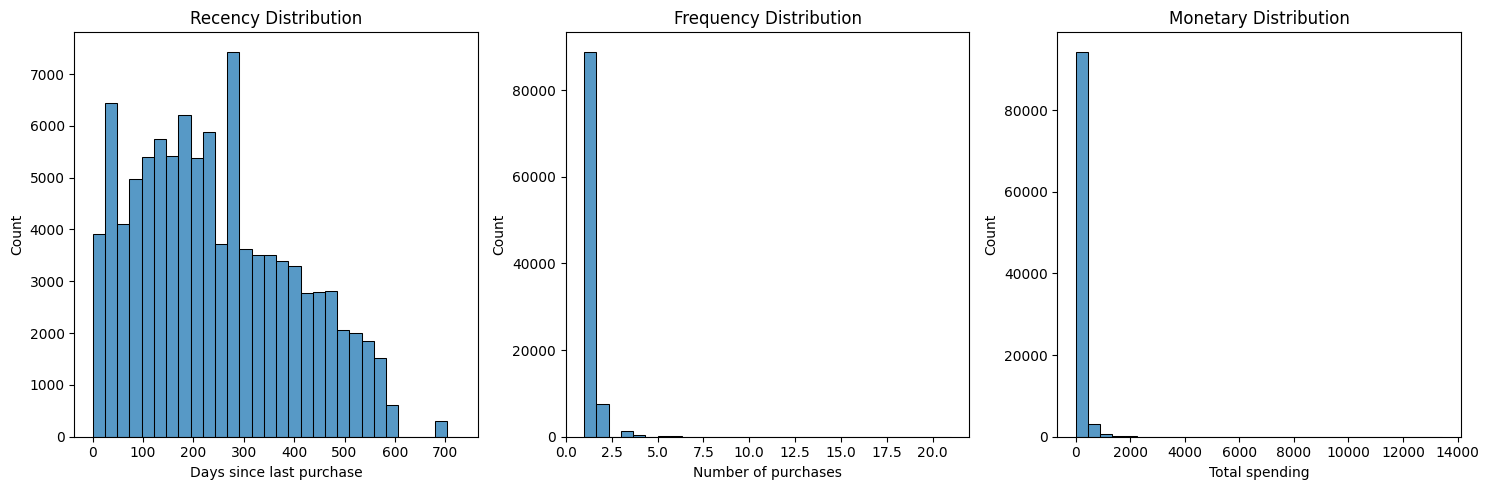


Recency Statistics:
count    98666.000000
mean       244.815803
std        153.392909
min          0.000000
25%        121.000000
50%        226.000000
75%        355.000000
max        728.000000
Name: recency, dtype: float64

Frequency Statistics:
count    98666.000000
mean         1.141731
std          0.538452
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         21.000000
Name: frequency, dtype: float64

Monetary Statistics:
count    98666.000000
mean       137.754076
std        210.645145
min          0.850000
25%         45.900000
50%         86.900000
75%        149.900000
max      13440.000000
Name: monetary, dtype: float64


In [19]:
q3_final = recency.merge(frequency, on='customer_id').merge(monetary, on='customer_id')
# Set up the plot
plt.figure(figsize=(15, 5))

# Plot Recency distribution
plt.subplot(1, 3, 1)
sns.histplot(data=q3_final, x='recency', bins=30)
plt.title('Recency Distribution')
plt.xlabel('Days since last purchase')

# Plot Frequency distribution
plt.subplot(1, 3, 2)
sns.histplot(data=q3_final, x='frequency', bins=30)
plt.title('Frequency Distribution')
plt.xlabel('Number of purchases')

# Plot Monetary distribution
plt.subplot(1, 3, 3)
sns.histplot(data=q3_final, x='monetary', bins=30)
plt.title('Monetary Distribution')
plt.xlabel('Total spending')

plt.tight_layout()
plt.show()

# Print basic statistics for each metric
print("\nRecency Statistics:")
print(q3_final['recency'].describe())
print("\nFrequency Statistics:")
print(q3_final['frequency'].describe())
print("\nMonetary Statistics:")
print(q3_final['monetary'].describe())

Dari data bisa dilihat bahwa left skewness sangat pada frequency dan monetary

Jadi nilainya adalah

Recency:
- 4: 0-100 days (Very recent customers)
- 3: 101-200 days
- 2: 201-300 days
- 1: 301-400 days
- 0: >400 days (Inactive customers)

Frequency
- 4: >5 purchases (Very frequent buyers)
- 3: 4-5 purchases
- 2: 3 purchases
- 1: 2 purchases
- 0: 1 purchase (One-time buyers)

Monetary:
- 4: >2000 (High spenders)
- 3: 1500-2000
- 2: 1000-1500
- 1: 500-1000
- 0: <500 (Low spenders)

In [20]:
# Create scoring functions for each metric
def r_score(x):
   if x <= 100:
       return 4
   elif x <= 200:
       return 3
   elif x <= 300:
       return 2
   elif x <= 400:
       return 1
   else:
       return 0

def f_score(x):
   if x > 5:
       return 4
   elif x > 4:
       return 3
   elif x > 3:
       return 2
   elif x > 2:
       return 1
   else:
       return 0

def m_score(x):
   if x > 2000:
       return 4
   elif x > 1500:
       return 3
   elif x > 1000:
       return 2
   elif x > 500:
       return 1
   else:
       return 0

# Apply scoring to create new columns
q3_final['R'] = q3_final['recency'].apply(r_score)
q3_final['F'] = q3_final['frequency'].apply(f_score)
q3_final['M'] = q3_final['monetary'].apply(m_score)
q3_final['Total_RFM'] = q3_final['R'] + q3_final['F'] + q3_final['M']

print(q3_final.head())

                        customer_id  recency  frequency  monetary  R  F  M  \
0  00012a2ce6f8dcda20d059ce98491703      292          1     89.80  2  0  0   
1  000161a058600d5901f007fab4c27140      413          1     54.90  0  0  0   
2  0001fd6190edaaf884bcaf3d49edf079      551          1    179.99  0  0  0   
3  0002414f95344307404f0ace7a26f1d5      382          1    149.90  1  0  0   
4  000379cdec625522490c315e70c7a9fb      153          1     93.00  3  0  0   

   Total_RFM  
0          2  
1          0  
2          0  
3          1  
4          3  


Korelasi antara RFM beserta total dan juga distribusi pada masing-masing kolom

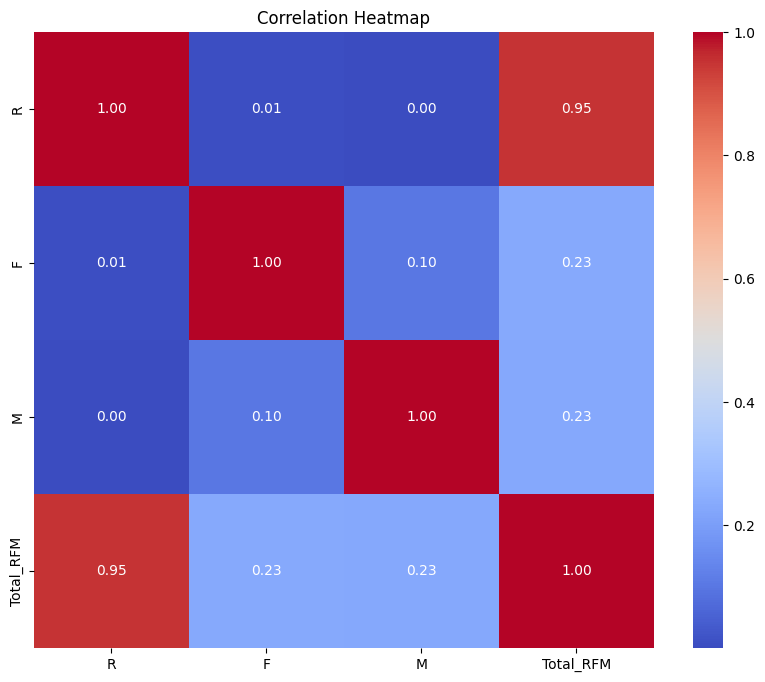

In [21]:
#Korelasi RFM
correlation_matrix = q3_final[['R', 'F', 'M', 'Total_RFM']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

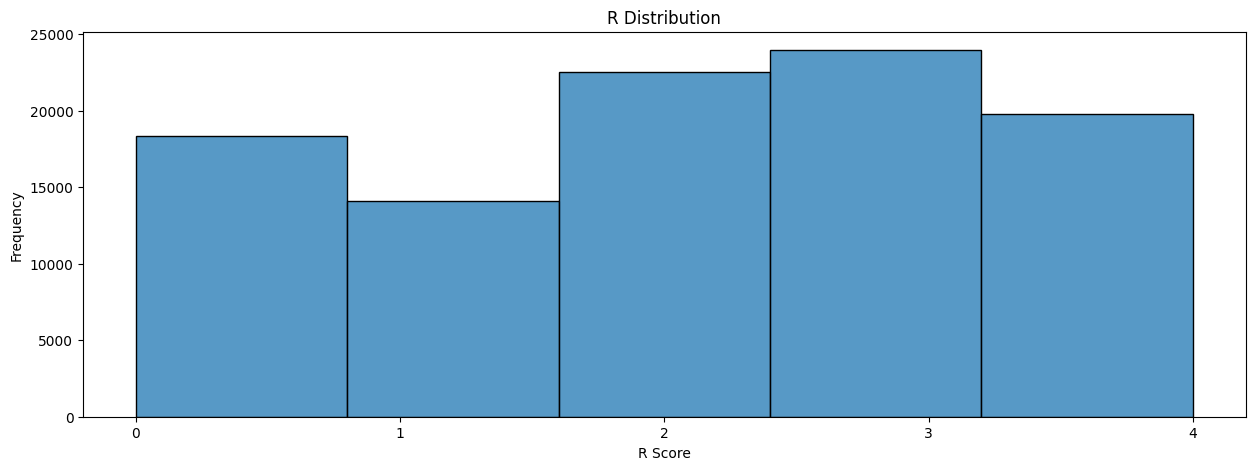

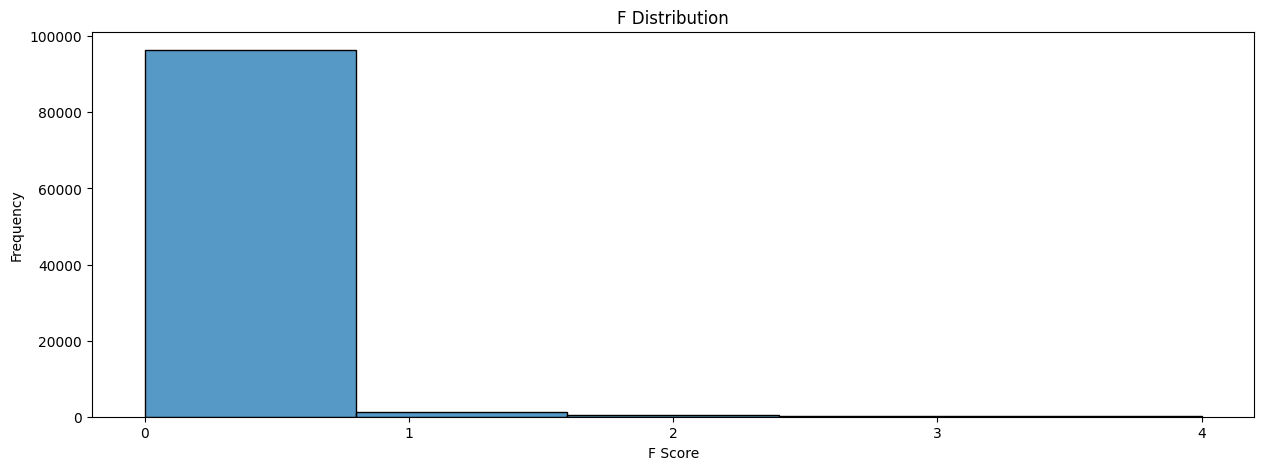

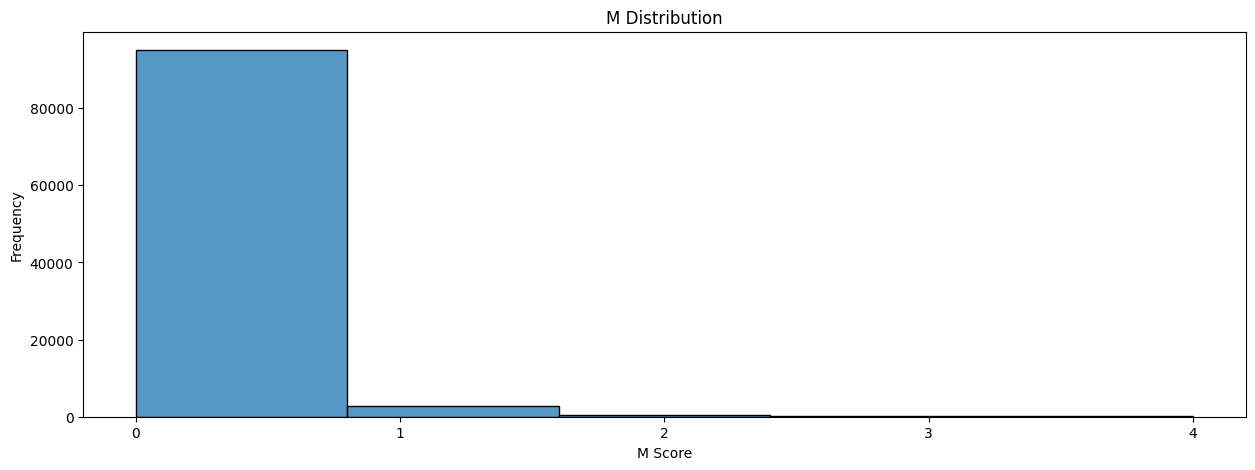

In [22]:
#Distrbusi R, F, dan M
plt.figure(figsize=(15, 5))

# Plot R distribution
sns.histplot(data=q3_final, x='R', bins=5)
plt.title('R Distribution')
plt.xlabel('R Score')
plt.xticks(range(5), ['0', '1', '2', '3', '4'])
plt.ylabel('Frequency')
plt.show()

# Plot F distribution4
plt.figure(figsize=(15, 5))
sns.histplot(data=q3_final, x='F', bins=5)
plt.title('F Distribution')
plt.xlabel('F Score')
plt.xticks(range(5), ['0', '1', '2', '3', '4'])
plt.ylabel('Frequency')
plt.show()

# Plot M distribution
plt.figure(figsize=(15, 5))
sns.histplot(data=q3_final, x='M', bins=5)
plt.title('M Distribution')
plt.xlabel('M Score')
plt.xticks(range(5), ['0', '1', '2', '3', '4'])
plt.ylabel('Frequency')
plt.show()

In [23]:
print(q3_final['R'].value_counts())
print(q3_final['F'].value_counts())
print(q3_final['M'].value_counts())

R
3    23950
2    22522
4    19741
0    18347
1    14106
Name: count, dtype: int64
F
0    96379
1     1322
2      505
4      256
3      204
Name: count, dtype: int64
M
0    95049
1     2674
2      558
3      241
4      144
Name: count, dtype: int64


## Visualization & Explanatory Analysis

### Pertanyaan 1:

Visualisasi dari pertanyaan 1, jumlah consumer berdasarkan state

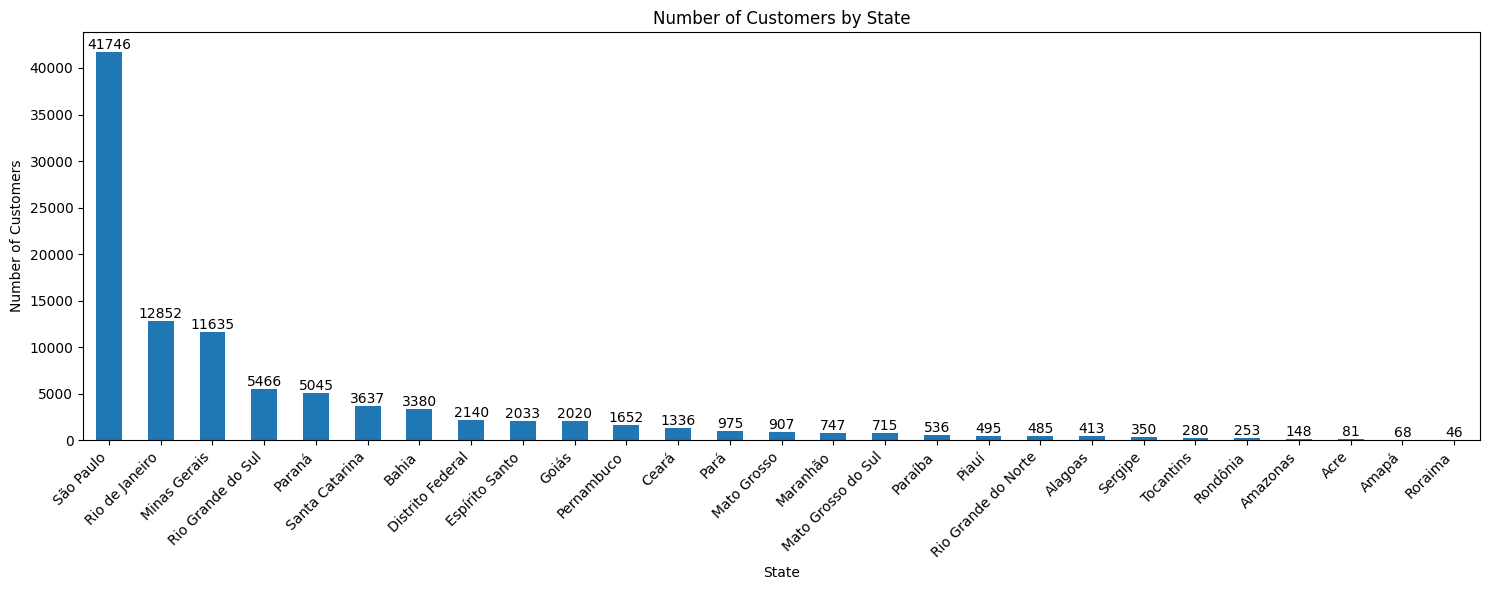

In [24]:
plt.figure(figsize=(15,6))
chart = q1_df['customer_state'].value_counts().plot(kind='bar')
plt.title('Number of Customers by State')
plt.xlabel('State')
plt.ylabel('Number of Customers')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for i in chart.containers:
    chart.bar_label(i)

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

### Pertanyaan 2:

Karena banyaknya data yang akan ditampilkan, akan ditampilkan 25 rute termahal dan 25 rute termurah

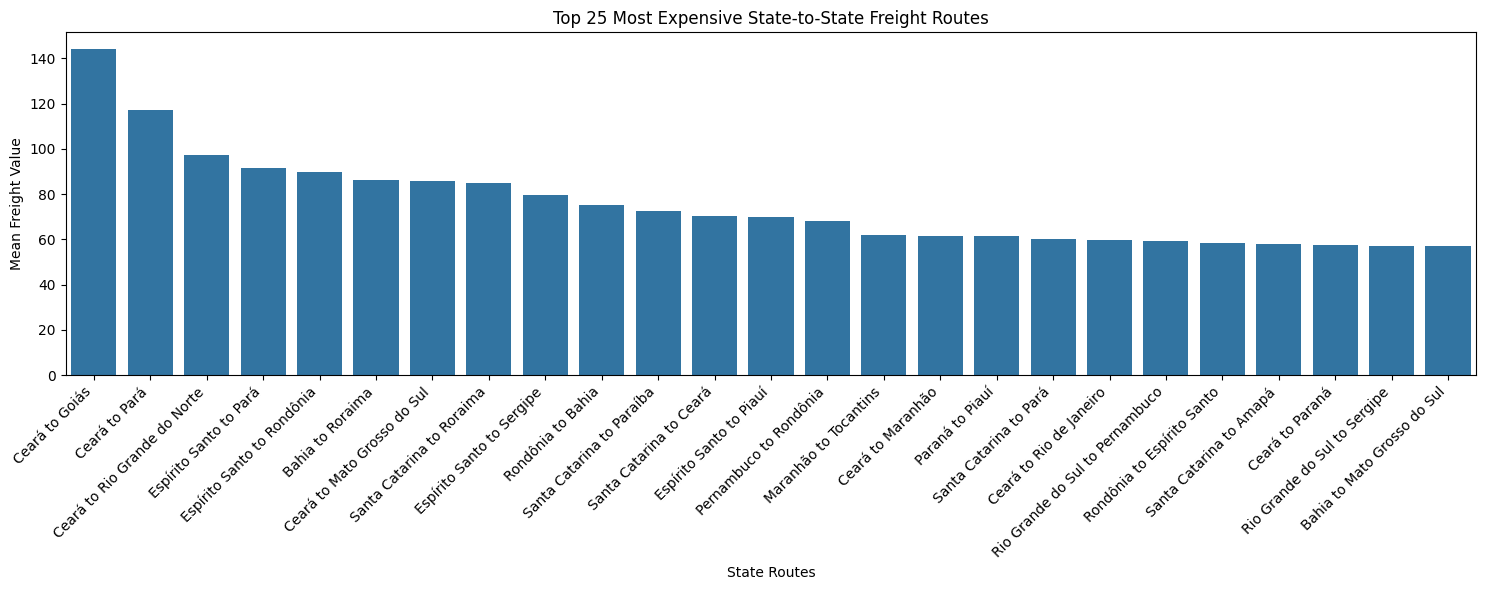

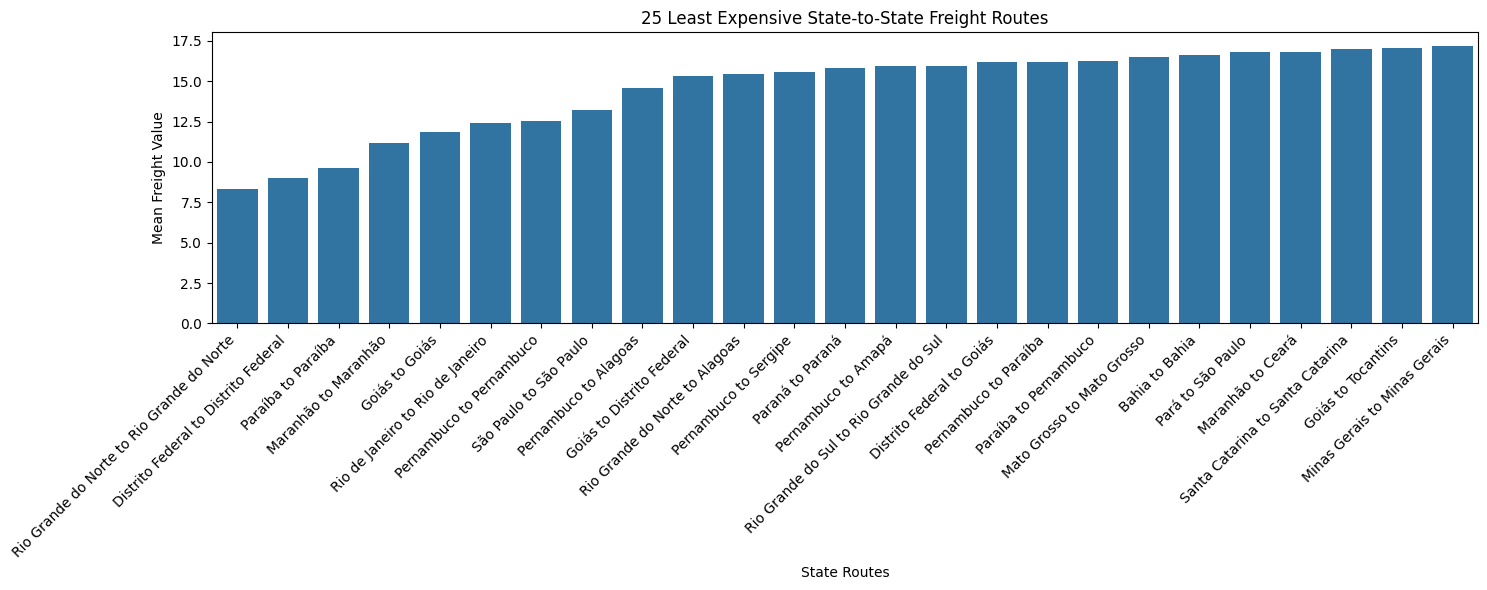

In [25]:
# Plot top 25
plt.figure(figsize=(15, 6))
top_25 = q2_df_final.sort_values(by='mean_freight', ascending=False).head(25)
chart1 = sns.barplot(data=top_25, x='state_to_state', y='mean_freight')
plt.title('Top 25 Most Expensive State-to-State Freight Routes')
plt.xticks(rotation=45, ha='right')
plt.xlabel('State Routes')
plt.ylabel('Mean Freight Value')
plt.tight_layout()
plt.show()

# Plot bottom 25
plt.figure(figsize=(15, 6))
bottom_25 = q2_df_final.sort_values(by='mean_freight', ascending=True).head(25)
chart2 = sns.barplot(data=bottom_25, x='state_to_state', y='mean_freight')
plt.title('25 Least Expensive State-to-State Freight Routes')
plt.xticks(rotation=45, ha='right')
plt.xlabel('State Routes')
plt.ylabel('Mean Freight Value')
plt.tight_layout()
plt.show()

**Insight:**
- Pengguna terbanyak berada di Sao Paolo
- Biaya paling mahal dalam ongkir yakni Ceara ke Goias

## Analisis Lanjutan (Opsional)

Untuk menambah insight, kita akan menambahkan analisa RFM

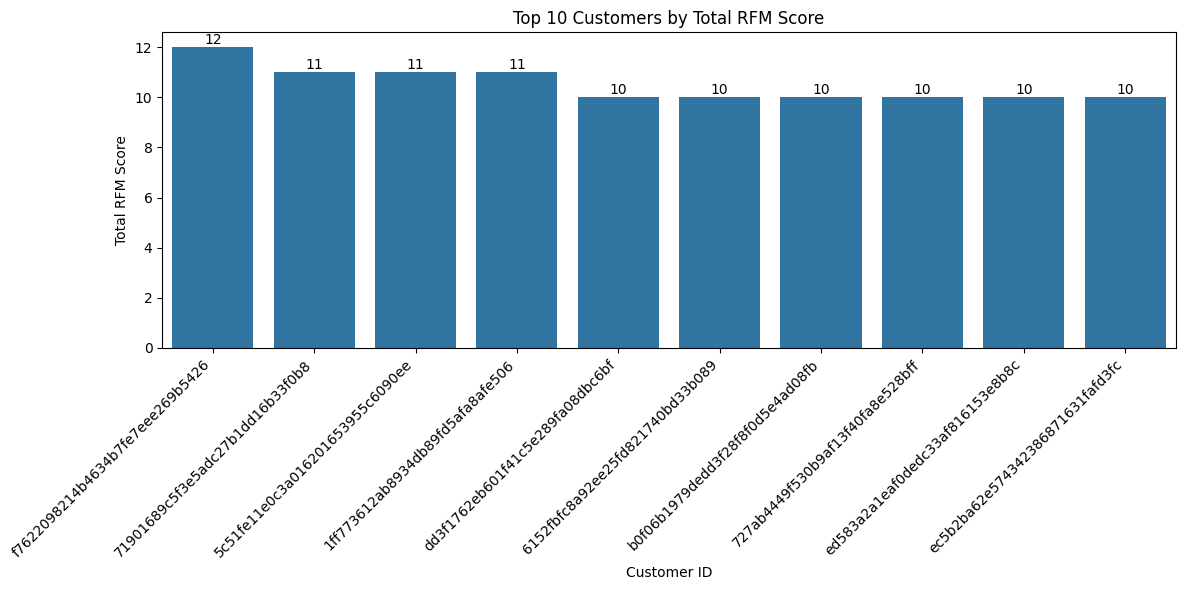

In [26]:
# Get top 10 customers
top_10_user = q3_final.sort_values(by='Total_RFM', ascending=False).head(10)

# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_user, x='customer_id', y='Total_RFM')
plt.title('Top 10 Customers by Total RFM Score')
plt.xlabel('Customer ID')
plt.ylabel('Total RFM Score')

# Rotate x-labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of bars
for i in range(len(top_10_user)):
    plt.text(i, top_10_user['Total_RFM'].iloc[i],
             str(top_10_user['Total_RFM'].iloc[i]),
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

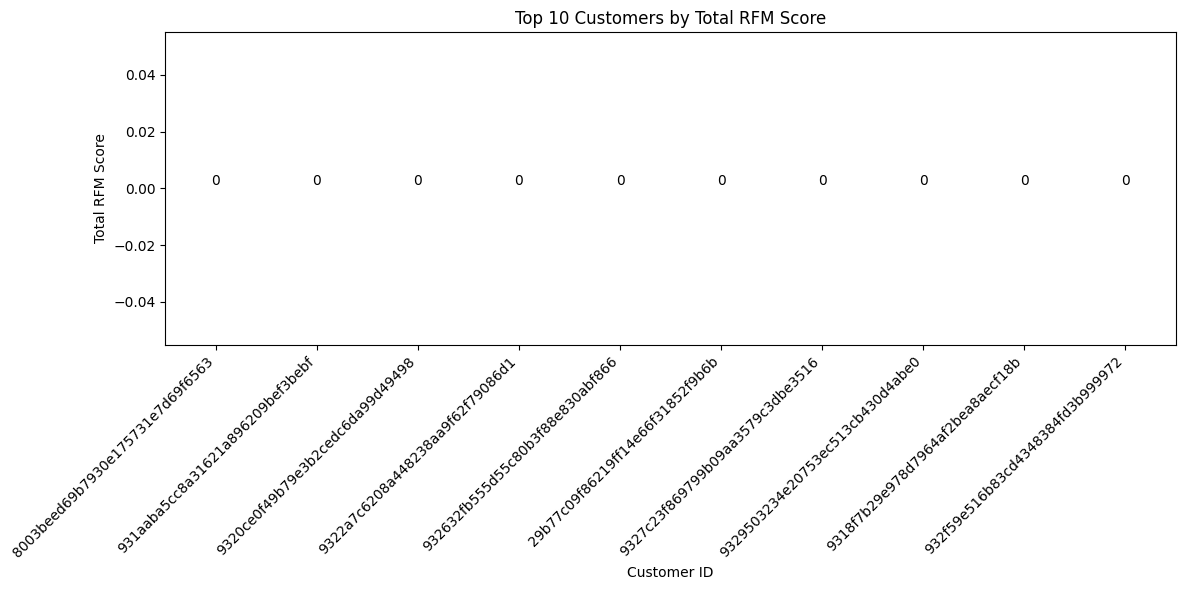

In [27]:
#Bottom 10
# Get top 10 customers
top_10_user = q3_final.sort_values(by='Total_RFM', ascending=True).head(10)

# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_user, x='customer_id', y='Total_RFM')
plt.title('Top 10 Customers by Total RFM Score')
plt.xlabel('Customer ID')
plt.ylabel('Total RFM Score')

# Rotate x-labels for better readability
plt.xticks(rotation=45, ha='right')
# Add value labels on top of bars
for i in range(len(top_10_user)):
    plt.text(i, top_10_user['Total_RFM'].iloc[i],
             str(top_10_user['Total_RFM'].iloc[i]),
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

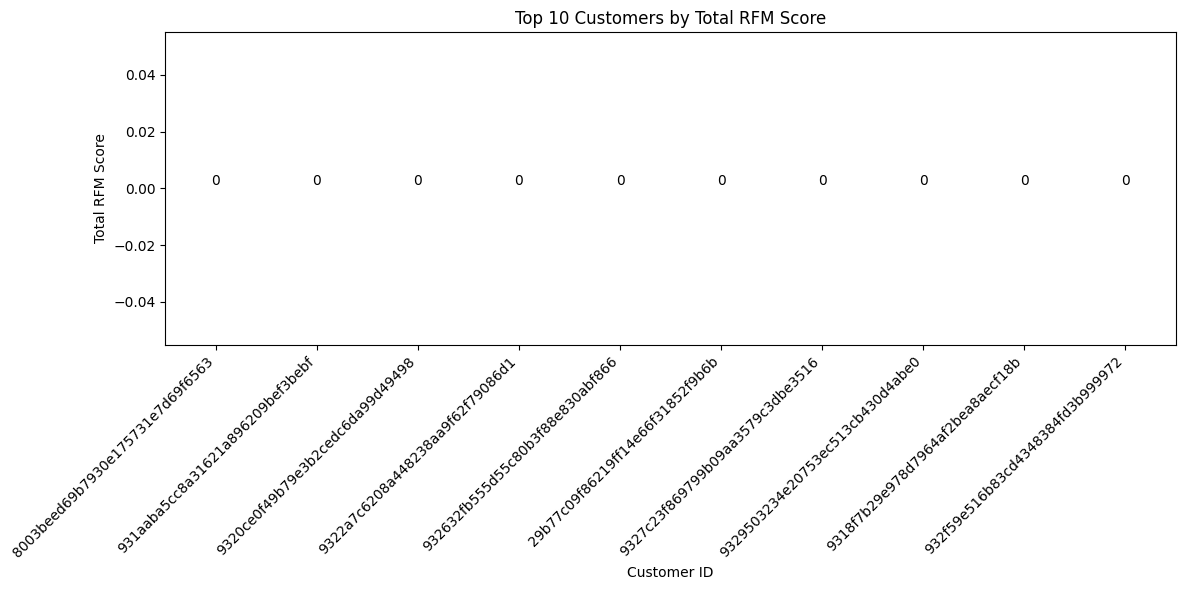

In [28]:
#Bottom 10
# Get top 10 customers
top_10_user = q3_final.sort_values(by='Total_RFM', ascending=True).head(10)

# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_user, x='customer_id', y='Total_RFM')
plt.title('Top 10 Customers by Total RFM Score')
plt.xlabel('Customer ID')
plt.ylabel('Total RFM Score')

# Rotate x-labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of bars
for i in range(len(top_10_user)):
    plt.text(i, top_10_user['Total_RFM'].iloc[i],
             str(top_10_user['Total_RFM'].iloc[i]),
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

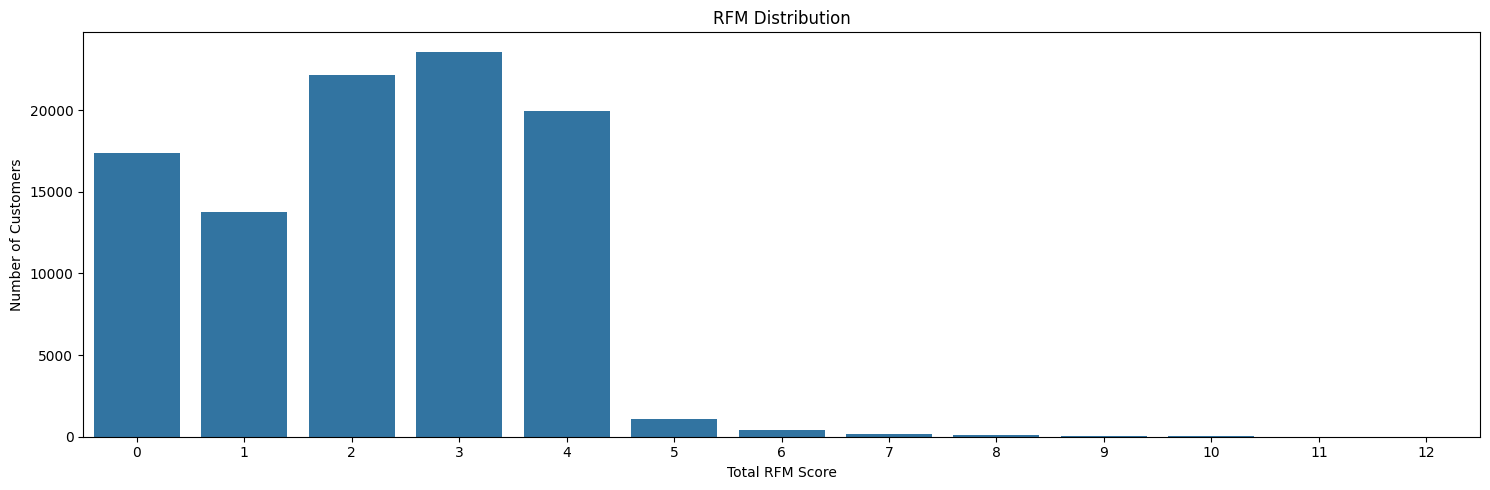

In [32]:
#Persebaran RFM
rfm_distribution = q3_final['Total_RFM'].value_counts().reset_index()
rfm_distribution.columns = ['Total_RFM', 'Total_user']
plt.figure(figsize=(15, 5))
sns.barplot(data=rfm_distribution, x='Total_RFM', y='Total_user')
plt.title('RFM Distribution')
plt.xlabel('Total RFM Score')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

**Insight:**
- User yang memiliki RFM tertinggi yaitu f7622098214b4634b7fe7eee269b5426
- RFM terbanyak didominasi oleh nilai 0 - 4, hal ini menunjukkan untuk mencapai threshold tertinggi hanya pelanggan setia
- Para pelanggan setia dapat diberikan reward atau diskon khusus

## Conclusion

- State yang memiliki konsumen terbanyak di antaranya Sao Paulo, Rio de Janeiro, serta Minas Gerais
- Biaya ongkir murah biasanya pengiriman antar state, namun juga terdapat beberapa kasus di mana harga ongkir murah meskipun beda state, dan hal itu didominasi oleh pengiriman ke atau dari Penambuco, dan harga pengiriman ongkir mahal didominasi oleh pengiriman ke atau dari Ceara, Espirito Santo, dan Santa Catarina
- Hanya ada 1 orang yang memiliki RFM sempurna dan terdapat 3 pengguna yang memiliki skor RFM bernilai 11 (maksimal 12) karena terdapat pengguna yang sangat sering belanja hingga 21 kali, sehingga nilai RFM cukup timpang karena left skewness, id pengguna yang sempurna yaitu f7622098214b4634b7fe7eee269b5426, dan 3 yang memiliki nilai 11 71901689c5f3e5adc27b1dd16b33f0b8; 5c51fe11e0c3a016201653955c6090ee; 1ff773612ab8934db89fd5afa8afe506.